__HOMEWORK 7: NAIVE BAYES__

Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB63

In [1]:
import numpy as np
import pandas as pd

# Problem 1

In [2]:
def open_data(file, sep=None):
    if sep:
        data = pd.read_csv(file, sep=sep)
    else:
        data = pd.read_csv(file, sep=sep)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

In [3]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.X = None
        self.y = None
        self.prior = None
        self.features = {'categorical': {}, 'numerical': {}}
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        self.prior = y.value_counts(normalize=True)
        for col in self.X:
            if np.issubdtype(X[col], np.number):
                self.features['numerical'][col] = []
                self.features['numerical'][col].append(X[col].mean())
                self.features['numerical'][col].append(X[col].var())
            else:
                count = X[col].value_counts()
                if count.any()==0:
                    alpha = count.shape[0]
                    self.features['categorical'][col] = [(count[i]+1)/X.shape[0]+alpha for i in X[col]]
                else:
                    self.features['categorical'][col] = X[col].value_counts(normalize=True)
                
    def num_prob(self, mean, var, x):
        result = 1/np.sqrt(2 * np.pi * var) * np.exp(-(x - mean)**2/(2 * var))
        return result
    
    def predict(self, X):
        y_pred = [self.predict_each(X.iloc[i, :]) for i in range(X.shape[0])]
        return y_pred
        
    def predict_each(self, x):
        predict = {}
        
        for target in self.prior.index:
            prior = self.prior[target]
            prob = prior
            for feature in x.index:
                if feature in self.features['numerical']:
                    mean, var = self.features['numerical'][feature]
                    prob *= self.num_prob(mean, var, x[feature])
                else:
                    prob *= self.features['categorical'][feature][x[feature]]
            predict[target] = prob
        
        return max(predict)

In [4]:
X, y = open_data("Data/ung thư.csv", sep=',')
corr = X.corr(method="pearson")
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


In [5]:
X_train = X.iloc[:X.shape[0]//7*6, :]
X_test = X.iloc[X.shape[0]//7*6:, :]

y_train = y[:X.shape[0]//7*6]
y_test = y[X.shape[0]//7*6:]

In [6]:
X = X[['mean_radius', 'mean_texture', 'mean_smoothness']]

model = NaiveBayesClassifier()
model.fit(X_train, y_train)

In [7]:
y_predict = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Score =", accuracy)

Accuracy Score = 0.7349397590361446


# Ex2

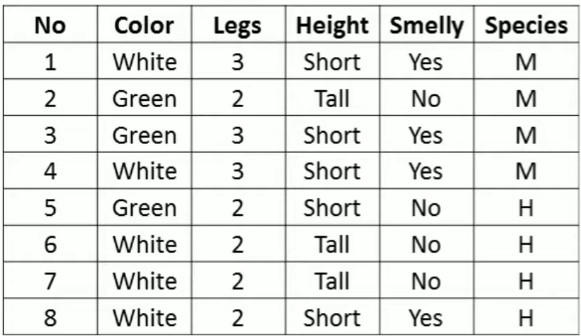